# Dragoman
<img align="right" src="https://raw.githubusercontent.com/philippeller/dragoman/master/dragoman.png" alt="Dragoman" width=150>

> A dragoman was an interpreter, translator, and official guide between Turkish, Arabic, and Persian-speaking countries and polities of the Middle East and European embassies, consulates, vice-consulates and trading posts. A dragoman had to have a knowledge of Arabic, Persian, Turkish, and European languages. (Source: wikipedia)

Similarly, the dragoman python library guides you through your data and translates between different representations.
Its aim is to offer a consistant and pythonic way to handle different datasaets and translations between them.
A dataset can for instance be simple colum/row data, or it can be data on a grid.

One of the key features of dragoman is the seamless translation from one data represenation into any other. 
Convenience `pyplot` plotting functions are also available, in order to produce standard plots without any hassle.

## Installation

* `git clone git@github.com:philippeller/dragoman.git`
* `pip install dragoman`

## Simple Examples

In [1]:
import numpy as np
import dragoman as dm

### Grid Data

GridData is a collection of individual GridArrays. Both have a defined grid, here we initialize the grid in the constructor through simple keyword arguments resulting in a 2d grid with axes `x` and `y`

In [2]:
g = dm.GridData(x = np.linspace(0,3*np.pi, 30),
                y = np.linspace(0,2*np.pi, 20),
               )

Filling one array with some sinusoidal functions, called `a` here

In [3]:
g['a'] = np.sin(g['x']) * np.cos(g['y'])

in 1-d and 2-d they render as html in jupyter notebooks

In [4]:
g['a']

y \ x,0,0.325,0.65,0.975,1.3,1.62,...,7.8,8.12,8.45,8.77,9.1,9.42
0,0,0.319,0.605,0.828,0.964,0.999,...,0.999,0.964,0.828,0.605,0.319,3.67e-16
0.331,0,0.302,0.572,0.783,0.911,0.944,...,0.944,0.911,0.783,0.572,0.302,3.47e-16
0.661,0,0.252,0.478,0.653,0.76,0.788,...,0.788,0.76,0.653,0.478,0.252,2.9e-16
0.992,0,0.175,0.331,0.453,0.527,0.546,...,0.546,0.527,0.453,0.331,0.175,2.01e-16
1.32,0,0.0784,0.149,0.203,0.237,0.245,...,0.245,0.237,0.203,0.149,0.0784,9.02e-17
1.65,-0,-0.0264,-0.05,-0.0684,-0.0796,-0.0825,...,-0.0825,-0.0796,-0.0684,-0.05,-0.0264,-3.03e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.63,-0,-0.0264,-0.05,-0.0684,-0.0796,-0.0825,...,-0.0825,-0.0796,-0.0684,-0.05,-0.0264,-3.03e-17
4.96,0,0.0784,0.149,0.203,0.237,0.245,...,0.245,0.237,0.203,0.149,0.0784,9.02e-17
5.29,0,0.175,0.331,0.453,0.527,0.546,...,0.546,0.527,0.453,0.331,0.175,2.01e-16


It can be plotted easily in case of 1-d and 2-d grids

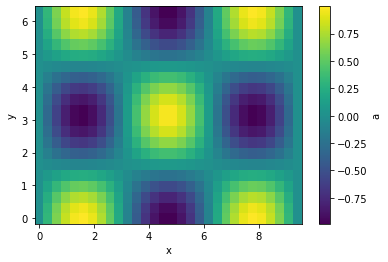

In [5]:
g.plot(cbar=True);

Let's interpolate the values to 200 points along each axis and plot

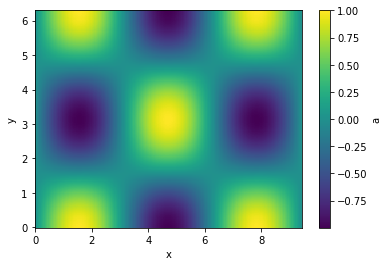

In [6]:
g.interp(x=200, y=200).plot(cbar=True);

The objects are also numpy compatible and indexable by index (integers) or values (floats). Numpy functions with axis keywords accept either the name of the axis, e.g. here `x` and therefore is independent of axis ordering, or the usual integer indices.

In [7]:
g[10::-1, :np.pi:2]

y \ x,3.25,2.92,2.6,2.27,1.95,1.62,1.3,0.975,0.65,0.325,0
0,a = -0.108,a = 0.215,a = 0.516,a = 0.762,a = 0.929,a = 0.999,a = 0.964,a = 0.828,a = 0.605,a = 0.319,a = 0
0.661,a = -0.0853,a = 0.17,a = 0.407,a = 0.601,a = 0.733,a = 0.788,a = 0.76,a = 0.653,a = 0.478,a = 0.252,a = 0
1.32,a = -0.0265,a = 0.0528,a = 0.127,a = 0.187,a = 0.228,a = 0.245,a = 0.237,a = 0.203,a = 0.149,a = 0.0784,a = 0
1.98,a = 0.0434,a = -0.0864,a = -0.207,a = -0.306,a = -0.373,a = -0.401,a = -0.387,a = -0.332,a = -0.243,a = -0.128,a = -0
2.65,a = 0.0951,a = -0.189,a = -0.453,a = -0.67,a = -0.817,a = -0.878,a = -0.847,a = -0.728,a = -0.532,a = -0.281,a = -0


In [8]:
np.sum(g[10::-1, :np.pi:2].T, axis='x')

y,0,0.661,1.32,1.98,2.65
a,6.03,4.76,1.48,-2.42,-5.3


### Comparison
As comparison to point out the convenience, an alternative way without using Dragoman to achieve the above would look something like the follwoing:

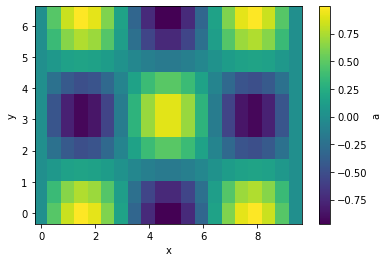

In [9]:
x = np.linspace(0,3*np.pi, 20)
y = np.linspace(0,2*np.pi, 10) 

xx, yy = np.meshgrid(x, y)

a = np.sin(xx) * np.cos(yy)

import matplotlib.pyplot as plt

x_widths = np.diff(x)
x_pixel_boundaries = np.concatenate([[x[0] - 0.5*x_widths[0]], x[:-1] + 0.5*x_widths, [x[-1] + 0.5*x_widths[-1]]])
y_widths = np.diff(y)
y_pixel_boundaries = np.concatenate([[y[0] - 0.5*y_widths[0]], y[:-1] + 0.5*y_widths, [y[-1] + 0.5*y_widths[-1]]])

pc = plt.pcolormesh(x_pixel_boundaries, y_pixel_boundaries, a)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')
cb = plt.colorbar(pc)
cb.set_label('a')

In [10]:
from scipy.interpolate import griddata

interp_x = np.linspace(0,3*np.pi, 200)
interp_y = np.linspace(0,2*np.pi, 100) 

grid_x, grid_y = np.meshgrid(interp_x, interp_y)

points = np.vstack([xx.flatten(), yy.flatten()]).T
values = a.flatten()

interp_a = griddata(points, values, (grid_x, grid_y), method='cubic')

### PointData

Another representation of data is `PointData`, which is not any different of a dictionary holding same-length nd-arrays or a pandas `DataFrame` (And can actually be instantiated with those)

In [11]:
p = dm.PointData()
p['x'] = np.random.randn(10000)
p['a'] = np.random.rand(p.size)

In [12]:
p

x,0.641,1.06,-0.342,0.362,0.133,0.0082,...,-0.794,1.19,0.074,-0.932,-0.902,0.00585
a,0.381,0.774,0.829,0.334,0.363,0.605,...,0.219,0.305,0.479,0.288,0.351,0.873


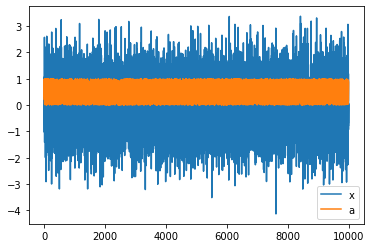

In [13]:
p.plot()
plt.legend();

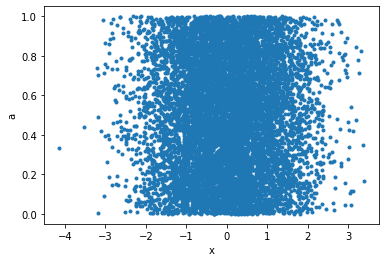

In [14]:
p.plot('x', 'a', '.');

This can now seamlessly be translated into `Griddata`, for example taking the data binwise in `x` in 10 bins, and in each bin summing up points:

In [15]:
p.binwise(x=10).sum()

x,[-4.136 -3.385],[-3.385 -2.633],[-2.633 -1.882],[-1.882 -1.131],[-1.131 -0.38 ],[-0.38 0.371],[0.371 1.122],[1.122 1.874],[1.874 2.625],[2.625 3.376]
a,0.774,25.4,123,509,1.12e+03,1.47e+03,1.13e+03,514,120,23.5


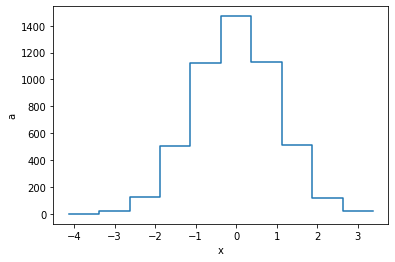

In [16]:
p.binwise(x=10).sum().plot();

This is equivalent of making a weighted histogram, while the latter is faster.

In [17]:
p.histogram(x=10)

x,[-4.136 -3.385],[-3.385 -2.633],[-2.633 -1.882],[-1.882 -1.131],[-1.131 -0.38 ],[-0.38 0.371],[0.371 1.122],[1.122 1.874],[1.874 2.625],[2.625 3.376]
a,0.774,25.4,123,509,1.12e+03,1.47e+03,1.13e+03,514,120,23.5
counts,2,44,250,1.01e+03,2.21e+03,2.94e+03,2.22e+03,1.03e+03,246,45


In [18]:
np.allclose(p.histogram(x=10)['a'], p.binwise(x=10).sum()['a'])

True

There is also KDE in n-dimensions available, for example:

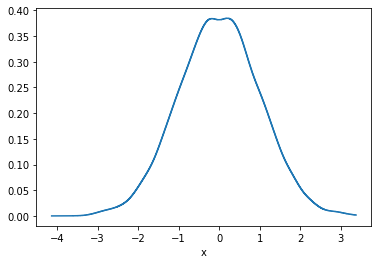

In [19]:
p.kde(x=1000)['a'].plot();